# Data visualize "Prepared Food" Supply amount by zip code
## Take 2
- We have to check supply amount by GPCFB as well.

In [1]:
# to read and visualize spatial data
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


## Preparing to draw the boundary

In [2]:
# df_bound is for boundary plotting
path = "./geo_data/tl_2021_us_county/tl_2021_us_county.shp" # from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29
df_bound = gpd.read_file(path)
df_bound = df_bound.to_crs("EPSG:4326")

# All US -> Only PA
df_bound = df_bound[df_bound["STATEFP"] == "42"]
# All PA -> Only the 11 counties
df_bound = df_bound[df_bound["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", 
                                           "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

## Import geo data
You need to select the geo-data for your regional unit.  
(e.g.) If you have data by **zip code**, you have to select geo-data for zip code.

Zip code data is large, so it may take some time to load.

In [49]:
# Geodata of PA by Zipcode
path = "./geo_data/tl_2021_us_zcta520/tl_2021_us_zcta520.shp"
df_geo = gpd.read_file(path)
df_geo = df_geo.to_crs("EPSG:4326")

In [50]:
# check
df_geo.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,B5,G6350,S,1029067,0,+39.1517426,-085.7252769,"POLYGON ((-85.73410 39.15597, -85.72749 39.156..."
1,47870,47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,B5,G6350,S,53547,0,+39.5735818,-087.2459626,"POLYGON ((-87.24770 39.57431, -87.24770 39.574..."
3,47337,47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."


## Import data to be visualized
I made this data with "GPCFB_DistirbutePounds_Dataset.csv".   


In [18]:
# Read Supply data
df = pd.read_csv("./data/Ryo_GPCFB_DistirbutePounds_Dataset_r5.csv") 

/var/folders/wh/0plfxjrx4_g92p5l2k1ntcn80000gn/T/ipykernel_28098/2404009856.py:2: DtypeWarning: Columns (0,1,2,5,9,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/Ryo_GPCFB_DistirbutePounds_Dataset_r5.csv")


In [19]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductWeight,ProductCategory,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef
0,135649,435355,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/2/2019 8:20,2733.005,...,45.0,PDA,2,26-Condiments,DRY,PU,Sauce Spaghetti Sauce Meatless (100335),0.0,3 Federal-USDA,TEFAP
1,135649,435355,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/2/2019 8:20,2733.005,...,192.0,PDA,4,24-Rice,DRY,PU,Rice Brown US #1 (101032),0.0,3 Federal-USDA,TEFAP
2,135949,435655,1334,PVET2292-2,Inc. Soup Kitchen,15206,PROG-SK,ALLEGHENY,1/3/2019 9:40,180.0,...,36.0,PDA,1,07-Dairy Products,REFRIGERATED,PU,Milk 2% Fresh (111004),0.0,3 Federal-USDA,TEFAP
3,135949,435655,1334,PVET2292-2,Inc. Soup Kitchen,15206,PROG-SK,ALLEGHENY,1/3/2019 9:40,180.0,...,40.0,TEFAP-Onsite,1,15-Meat/Fish/Poultry,FROZEN,PU,Onsite Meat Beef Ground (100159),0.0,3 Federal-USDA,TEFAP
4,136550,436256,989,PJUB1501-1,Inc. Food Pantry,15219,PROG-FP,ALLEGHENY,1/8/2019 9:00,1827.007,...,135.0,PDA,6,10-Fruits Canned/Frozen,DRY,PU,Fruit Peaches Sliced (100218),0.0,3 Federal-USDA,TEFAP


In [20]:
df.Zip.unique()

array(['15140', '15206', '15219', '15232', '15221', '15208', '15203',
       '15202', '15102', nan, '15010', '15424', '16156', '16143', '16141',
       '16101', '16157', '16132', '16102', '16120', '16105', '16201',
       '16117', '15120', '15116', '15122', '15065', '16059', '15218',
       '15213', '15146', '15217', '15224', '15001', '15212', '15101',
       '15074', '15207', '15904', '15216', '15223', '15234', '15210',
       '15236', '15056', '15136', '15133', '15229', '16033', '15014',
       '15205', '15227', '15204', '15106', '15222', '15037', '15126',
       '15147', '15214', '15024', '15132', '16001', '15110', '15226',
       '15220', '15370', '15228', '15235', '15045', '15104', '15035',
       '15088', '15108', '15701', '15201', '15003', '15905', '15025',
       '16037', '15475', '15239', '16023', '15301', '16057', '15059',
       '16115', '15084', '16050', '15501', '15431-2007', '15148', '15145',
       '15131', '15211', '15341', '15144', '15005-1716', '15129', '15034',
     

In [21]:
df[df["Zip"] == "Pittsburgh"]

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductWeight,ProductCategory,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef
297346,215594,511374,1333,PVET2292-1,Inc. Food Pantry,Pittsburgh,15206,PROG-FP,ALLEGHENY,1/21/2021 9:20,...,5.0,132,PUR,3,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
298144,216041,511821,1364,PWOM1387-1,Inc.,Pittsburgh,15219,SHELTER-WM,ALLEGHENY,1/28/2021 10:00,...,5.0,44,PUR,1,07-Dairy Products,REFRIGERATED,DEL NO FEE,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
299729,217558,513339,1333,PVET2292-1,Inc. Food Pantry,Pittsburgh,15206,PROG-FP,ALLEGHENY,2/4/2021 9:10,...,5.0,176,PUR,4,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
348318,221276.0,517056,1333,PVET2292-1,Inc. Food Pantry,Pittsburgh,15206,PROG-FP,ALLEGHENY,3/18/2021 9:10,...,5.0,176,PUR,4,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
348341,222200.0,517981,1138,PPRI1100-1,Queen of Peace Parish,Pittsburgh,15203,PROG-FP,ALLEGHENY,3/23/2021 12:00,...,5.0,132,PUR,3,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
348418,224834.0,519626,1065,PMTA1046-1,Inc. - Food Pantry,Pittsburgh,15206,PROG-FP,ALLEGHENY,4/9/2021 10:00,...,5.0,132,PUR,3,07-Dairy Products,REFRIGERATED,DEL NO FEE,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
348458,225602.0,520394,1333,PVET2292-1,Inc. Food Pantry,Pittsburgh,15206,PROG-FP,ALLEGHENY,4/22/2021 0:00,...,5.0,88,PUR,2,07-Dairy Products,REFRIGERATED,ADVCHOICE,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
349451,225895.0,520689,1333,PVET2292-1,Inc. Food Pantry,Pittsburgh,15206,PROG-FP,ALLEGHENY,4/29/2021 9:10,...,5.0,176,PUR,4,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
349664,229148.0,521951,989,PJUB1501-1,Inc. Food Pantry,Pittsburgh,15219,PROG-FP,ALLEGHENY,5/11/2021 8:40,...,5.0,176,PUR,4,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN
349677,229833.0,522636,1138,PPRI1100-1,Queen of Peace Parish,Pittsburgh,15203,PROG-FP,ALLEGHENY,5/11/2021 10:20,...,5.0,44,PUR,1,07-Dairy Products,REFRIGERATED,PU,Dairy Milk 2percent Fresh Plastic Jug,NaN,NaN


In [28]:
df[df["Zip"]=="Pittsburgh"].shape

(35, 21)

In [29]:
df = df[df["Zip"]!="Pittsburgh"]

In [30]:
df.describe()

,NutritionID,ProductWeight
count,491071.000000,491071.000000
mean,4.950398,226.747804
std,1.591080,1470.279745
min,2.000000,-177390.000000
25%,5.000000,26.000000
50%,5.000000,65.000000
75%,6.000000,162.000000
max,7.000000,499999.000000


In [31]:
# Checked rows with NULL zipcode
df[df["Zip"]=="NULL"].shape

(0, 21)

In [33]:
# Make a column based on conditions
# If the line is '31-Prepared and Perishable Food', it is set to 1.

conditions = [ df['FAType'] == '31-Prepared and Perishable Food' ]
choices = [1]

df['Prepared_food'] = np.select(conditions, choices, default=0) 

In [34]:
df[df['Prepared_food'] == 1].shape

(21011, 22)

In [35]:
# Make a blank column

df["PF_poundage"]=np.nan

In [37]:
df.describe()

,NutritionID,ProductWeight,Prepared_food,PF_poundage
count,491071.000000,491071.000000,491835.000000,0.0
mean,4.950398,226.747804,0.042720,NaN
std,1.591080,1470.279745,0.202224,NaN
min,2.000000,-177390.000000,0.000000,NaN
25%,5.000000,26.000000,0.000000,NaN
50%,5.000000,65.000000,0.000000,NaN
75%,6.000000,162.000000,0.000000,NaN
max,7.000000,499999.000000,1.000000,NaN


In [40]:
# Caluculate Prepared Food Poundage
df = df.astype({'ProductWeight': float})
df["PF_poundage"] = df['ProductWeight'] * df['Prepared_food']

In [41]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,Prepared_food,PF_poundage
0,135649,435355,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/2/2019 8:20,2733.005,...,2,26-Condiments,DRY,PU,Sauce Spaghetti Sauce Meatless (100335),0.0,3 Federal-USDA,TEFAP,0,0.0
1,135649,435355,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/2/2019 8:20,2733.005,...,4,24-Rice,DRY,PU,Rice Brown US #1 (101032),0.0,3 Federal-USDA,TEFAP,0,0.0
2,135949,435655,1334,PVET2292-2,Inc. Soup Kitchen,15206,PROG-SK,ALLEGHENY,1/3/2019 9:40,180.0,...,1,07-Dairy Products,REFRIGERATED,PU,Milk 2% Fresh (111004),0.0,3 Federal-USDA,TEFAP,0,0.0
3,135949,435655,1334,PVET2292-2,Inc. Soup Kitchen,15206,PROG-SK,ALLEGHENY,1/3/2019 9:40,180.0,...,1,15-Meat/Fish/Poultry,FROZEN,PU,Onsite Meat Beef Ground (100159),0.0,3 Federal-USDA,TEFAP,0,0.0
4,136550,436256,989,PJUB1501-1,Inc. Food Pantry,15219,PROG-FP,ALLEGHENY,1/8/2019 9:00,1827.007,...,6,10-Fruits Canned/Frozen,DRY,PU,Fruit Peaches Sliced (100218),0.0,3 Federal-USDA,TEFAP,0,0.0


In [42]:
# merge, key=Zipcode
df_ = pd.merge(df, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [43]:
df_.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,Prepared_food,PF_poundage,ZCTA5CE20,geometry
0,135649,435355,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/2/2019 8:20,2733.005,...,DRY,PU,Sauce Spaghetti Sauce Meatless (100335),0.0,3 Federal-USDA,TEFAP,0,0.0,15140,"POLYGON ((-79.79154 40.41361, -79.79107 40.414..."
1,135649,435355,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/2/2019 8:20,2733.005,...,DRY,PU,Rice Brown US #1 (101032),0.0,3 Federal-USDA,TEFAP,0,0.0,15140,"POLYGON ((-79.79154 40.41361, -79.79107 40.414..."
2,136989,436695,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/9/2019 10:30,1348.0,...,DRY,PU,Beans Pinto Beans Dry (100382),0.0,3 Federal-USDA,TEFAP,0,0.0,15140,"POLYGON ((-79.79154 40.41361, -79.79107 40.414..."
3,136989,436695,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/9/2019 10:30,1348.0,...,DRY,PU,Beans Red Small Dry (100375),0.0,3 Federal-USDA,TEFAP,0,0.0,15140,"POLYGON ((-79.79154 40.41361, -79.79107 40.414..."
4,136989,436695,1121,PPIT1050-1,Inc. - Pitcairn Food Pantry,15140,PROG-FP,ALLEGHENY,1/9/2019 10:30,1348.0,...,DRY,PU,Fruit Peaches Sliced (100218),0.0,3 Federal-USDA,TEFAP,0,0.0,15140,"POLYGON ((-79.79154 40.41361, -79.79107 40.414..."


In [ ]:
# corrected data type
df_ = df_.astype({'ProductWeight': float})
df_ = df_.astype({'PF_poundage': float})
#df_ = df_.astype({'Zip': int})

In [ ]:
df_.describe()

,NutritionID,ProductWeight,Prepared_food,PF_poundage
count,484650.000000,484650.000000,484650.000000,484650.000000
mean,4.949423,211.090114,0.043029,2.152514
std,1.591075,838.900546,0.202923,42.639415
min,2.000000,-42654.000000,0.000000,-400.000000
25%,5.000000,26.000000,0.000000,0.000000
50%,5.000000,65.000000,0.000000,0.000000
75%,6.000000,162.000000,0.000000,0.000000
max,7.000000,110110.000000,1.000000,13336.000000


In [46]:
# deleated the poviders' data from other area
df_ = df_[df_["County"].isin(["ALLEGHENY",
"ARMSTRONG",
"BEAVER",
"BUTLER",
"CAMBRIA",
"FAYETTE",
"GREENE",
"INDIANA",
"LAWRENCE",
"SOMERSET",
"WASHINGTON"])]

In [47]:
# group zy zip
df_ = df_.groupby('Zip').sum()

In [51]:
# add geo-data
# df_geo = df_geo.astype({'ZCTA5CE20': int})
df_ = pd.merge(df_, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [52]:
# Rename a column name
df_ = df_.rename(columns={'ZCTA5CE20': 'zipcode'})

In [53]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

## Visualize the data

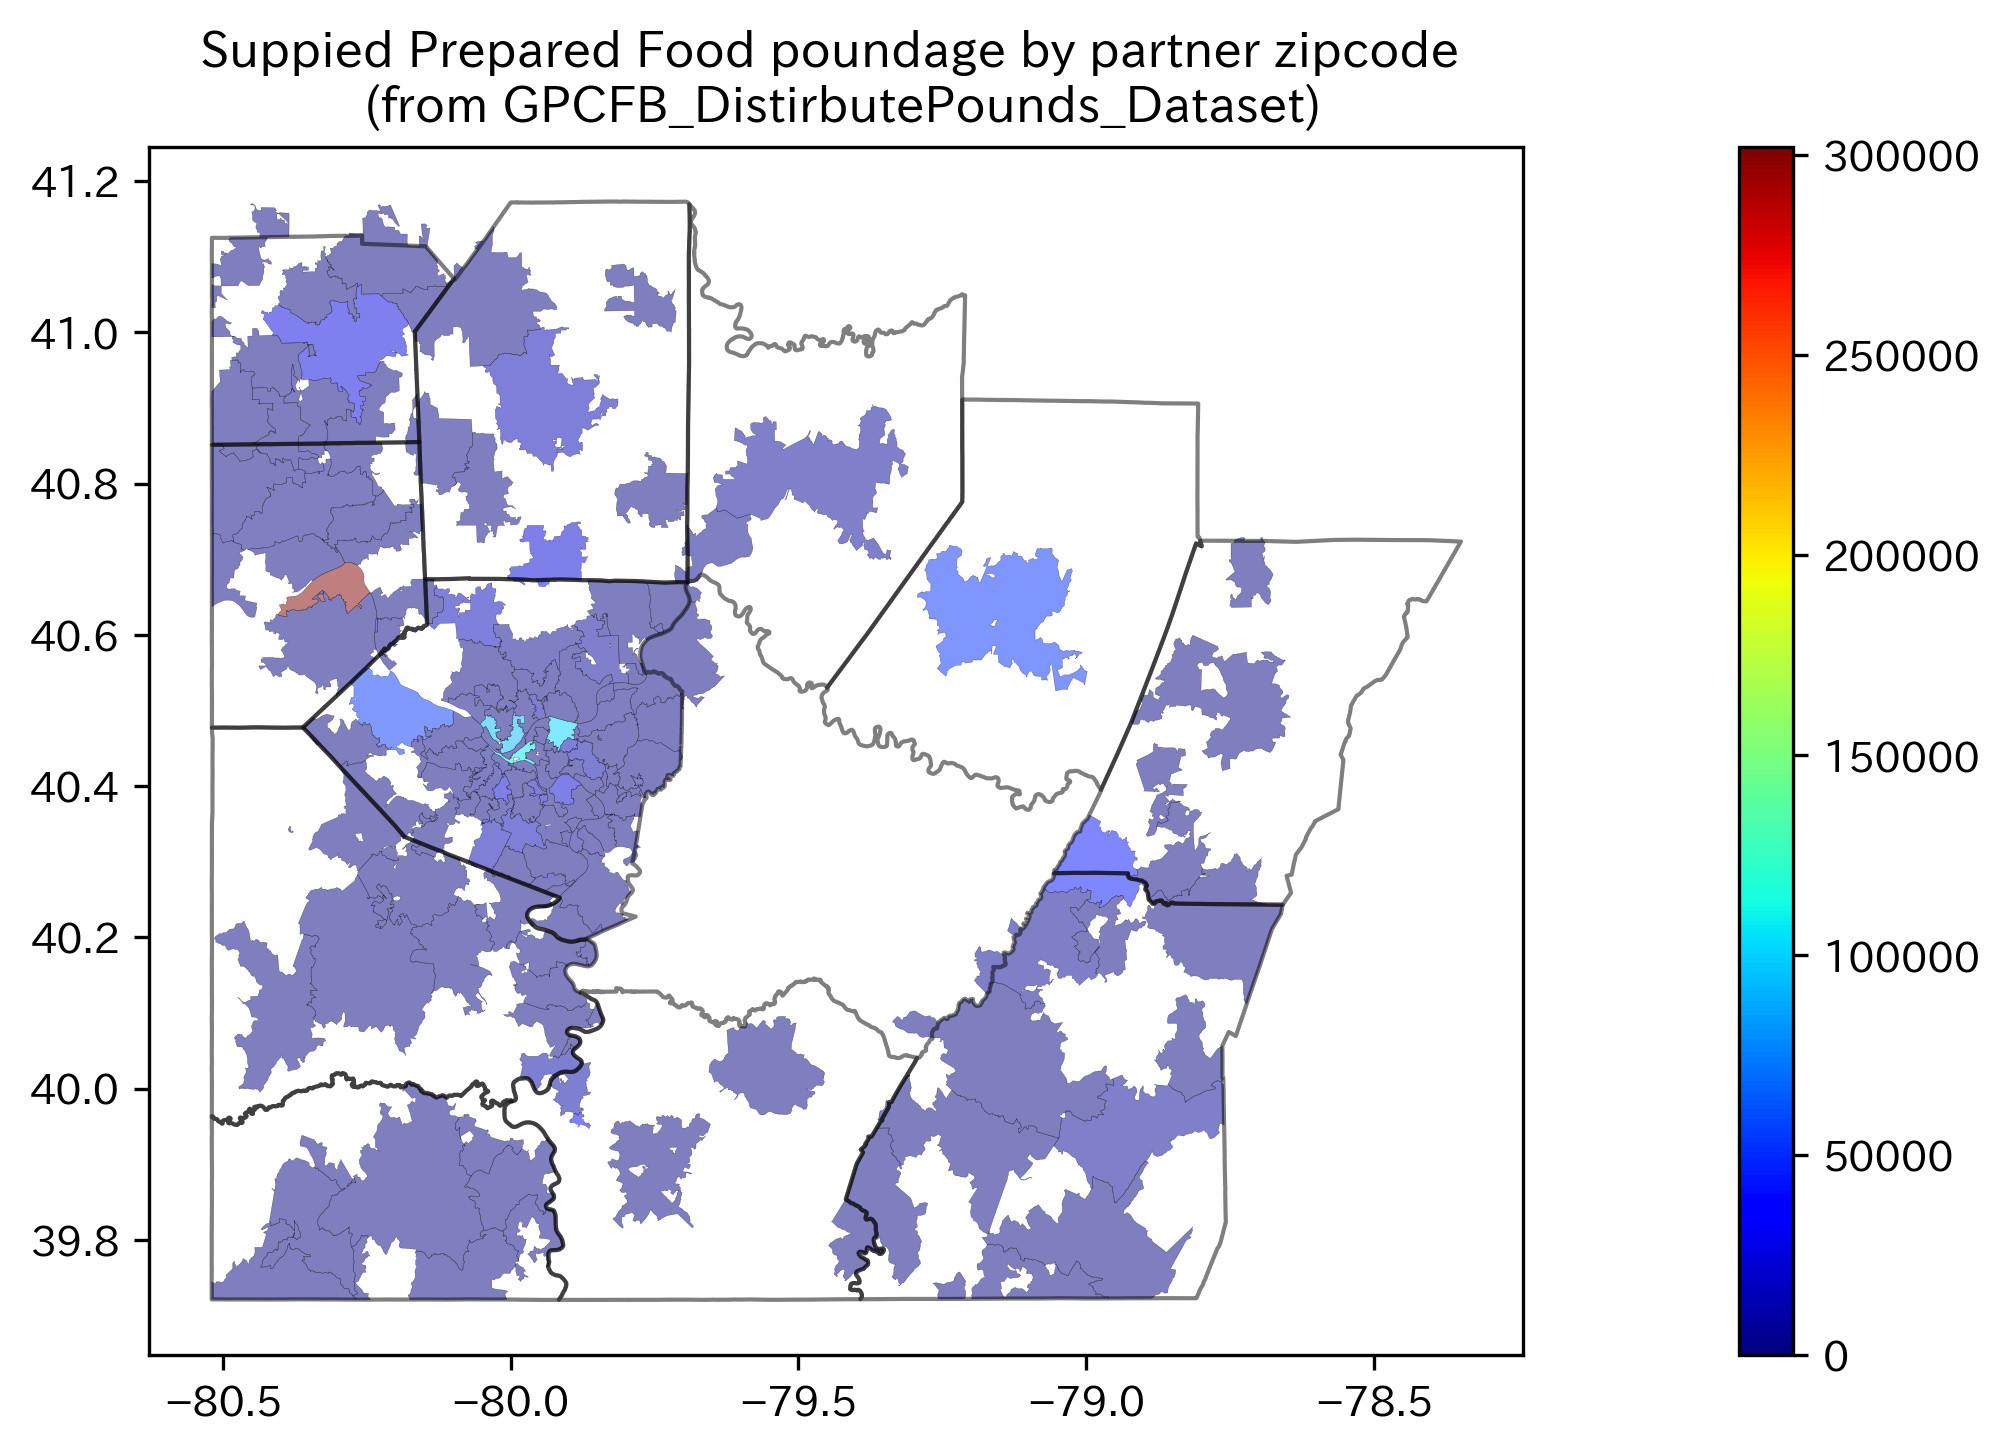

In [54]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata


# Specify the data column name that you want to visualize in color.
data = "PF_poundage"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Suppied Prepared Food poundage by partner zipcode \n (from GPCFB_DistirbutePounds_Dataset)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [55]:
conditions = [ df_['Prepared_food'] >= 1 ]
choices = [1]

df_['Prepared_food_2'] = np.select(conditions, choices, default=0) 

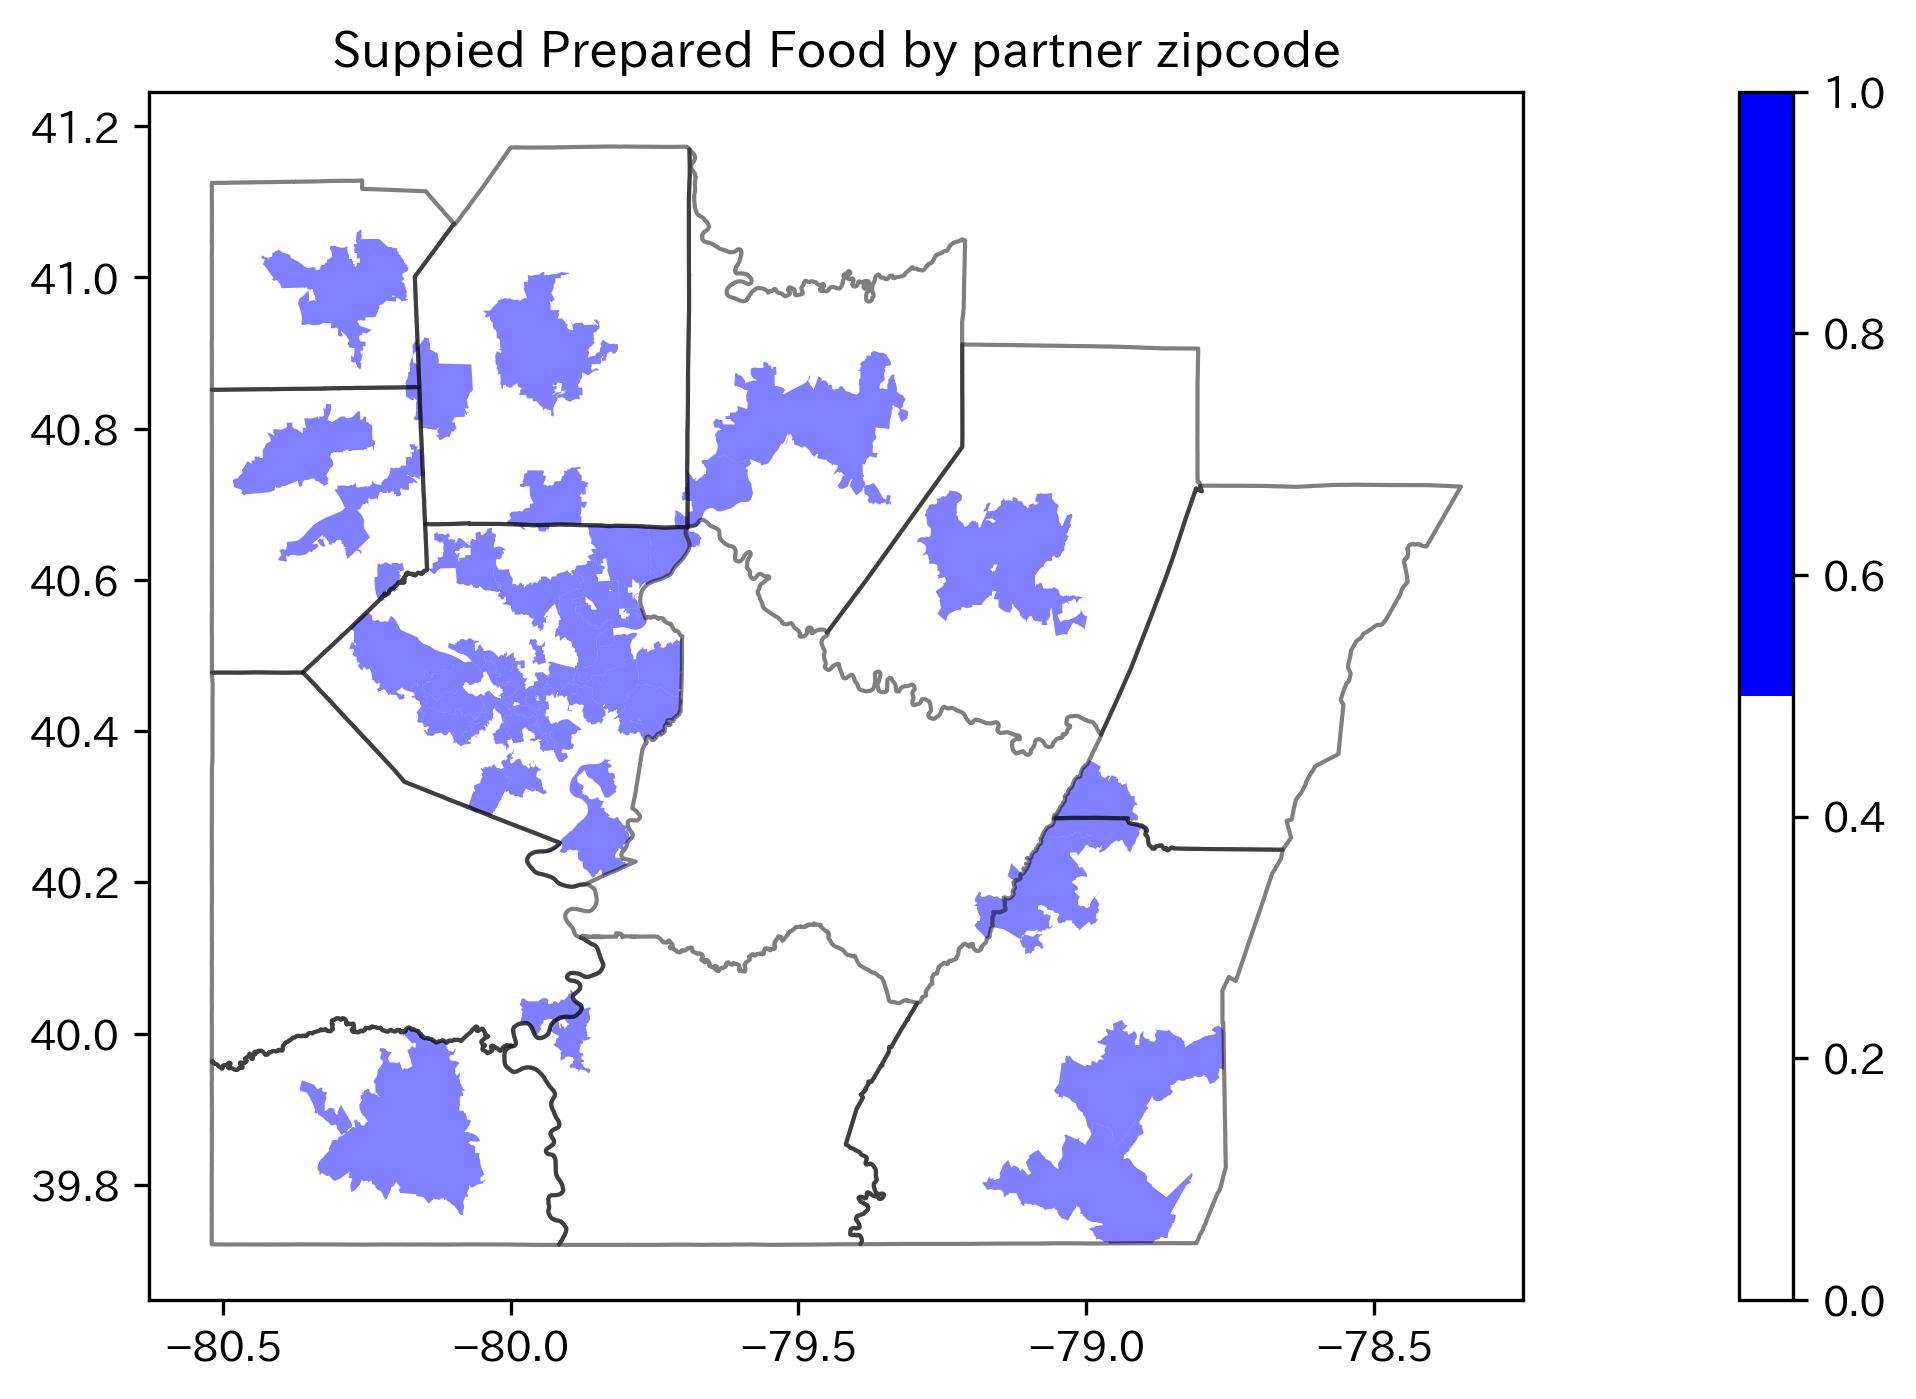

In [56]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Bicolor mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white","blue"])

# Specify the data column name that you want to visualize in color.
data = "Prepared_food_2"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Suppied Prepared Food by partner zipcode')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## Census tract -> ZIP

In [57]:
# Read census data
df_census = gpd.read_file("./data/FoodAccessResearchAtlasData2019_GpcbgArea_Population.csv") 

In [58]:
# check
df_census.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Total_Population,FI_Population,Demand_of_meals [meals/year],geometry
0,42003010300,Pennsylvania,Allegheny County,1,6600,282,1,6012,91.09,0,...,2,13,110,161,97,100,4221,0,0,None
1,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,2,8,162,119,805,248,4874,0,0,None
2,42003020300,Pennsylvania,Allegheny County,1,616,403,0,0,0,0,...,0,1,14,10,74,0,315,0,0,None
3,42003030500,Pennsylvania,Allegheny County,1,2256,1154,0,116,5.14,0,...,0,7,57,32,470,469,2693,0,0,None
4,42003040200,Pennsylvania,Allegheny County,1,2604,594,0,1259,48.35,0,...,0,7,52,61,254,224,2242,0,0,None


In [59]:
# Data for convert
df_cen_zip = pd.read_csv("./geo_data/ZIP_TRACT_122021.csv") 

In [60]:
df_cen_zip.head()

,zip,tract,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,15139,42003526101,OAKMONT,PA,0.000000,0.005587,0.000000,0.000469
1,15139,42003525100,OAKMONT,PA,0.288441,0.041899,0.050420,0.254456
2,15139,42003525300,OAKMONT,PA,0.274537,0.256983,0.172269,0.267355
3,15139,42003525200,OAKMONT,PA,0.437023,0.695531,0.777311,0.477720
4,15222,42003020300,PITTSBURGH,PA,0.293614,0.160600,0.299424,0.243931


In [61]:
print(df_cen_zip["tract"].dtypes)
print(df_census["CensusTract"].dtypes)

int64
object


In [62]:
# change dtype
df_census = df_census.astype({'CensusTract': int})

In [63]:
# merge, key=CensusTract
df_census = pd.merge(df_census, df_cen_zip, left_on='CensusTract', right_on='tract')

In [64]:
df_census.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,Demand_of_meals [meals/year],geometry,zip,tract,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,42003010300,Pennsylvania,Allegheny County,1,6600,282,1,6012,91.09,0,...,0,None,15219,42003010300,PITTSBURGH,PA,0.102612,0.101715,0.100457,0.102189
1,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15222,42003020100,PITTSBURGH,PA,0.688431,0.829306,0.681382,0.740996
2,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15272,42003020100,PITTSBURGH,PA,0.000000,1.000000,0.000000,1.000000
3,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15262,42003020100,PITTSBURGH,PA,0.000000,0.000000,1.000000,1.000000
4,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15259,42003020100,PITTSBURGH,PA,0.000000,0.000000,1.000000,1.000000


In [65]:
list(df_census)

['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [66]:
# change dtype
df_census = df_census.astype({'LILATracts_1And10': int})
df_census = df_census.astype({'Total_Population': int})
df_census = df_census.astype({'FI_Population': int})
df_census = df_census.astype({'Demand_of_meals [meals/year]': int})

In [88]:
# group zy zip
df_2 = df_census.groupby('zip').sum()

In [89]:
# bit が重なったところを直す。
conditions = [ df_2['LILATracts_1And10'] >= 1 ]
choices = [1]

df_2['LILATracts_1And10'] = np.select(conditions, choices, default=0) 

In [87]:
df_2.describe()

,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio,ZCTA5CE20
count,4.880000e+02,488.000000,488.000000,488.000000,4.880000e+02,4.880000e+02,488.000000,488.000000,488.000000,488.000000,488.000000
mean,1.708938e+11,0.233607,16129.590164,1221.801230,1.337872e+06,1.708938e+11,0.699607,0.759726,0.882282,0.941200,15570.858607
std,1.789120e+11,0.423559,16083.813177,2667.123963,2.920501e+06,1.789120e+11,0.445408,0.415793,0.314502,0.208415,409.926555
min,4.200325e+10,0.000000,936.000000,0.000000,0.000000e+00,4.200325e+10,0.000000,0.000000,0.000000,0.000173,15001.000000
25%,4.206396e+10,0.000000,4992.500000,0.000000,0.000000e+00,4.206396e+10,0.008434,0.722808,1.000000,1.000000,15226.750000
50%,8.425159e+10,0.000000,10715.500000,0.000000,0.000000e+00,8.425159e+10,1.000000,1.000000,1.000000,1.000000,15469.500000
75%,2.102563e+11,0.000000,20682.500000,0.000000,0.000000e+00,2.102563e+11,1.000000,1.000000,1.000000,1.000000,15928.250000
max,1.092083e+12,1.000000,96031.000000,15433.000000,1.689914e+07,1.092083e+12,1.000000,1.000000,1.000000,1.000000,16675.000000


In [74]:
df_geo = df_geo.astype({'ZCTA5CE20': int})
df_2 = pd.merge(df_2, df_geo[["ZCTA5CE20", "geometry"]], left_on="zip", right_on="ZCTA5CE20")

In [75]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_2, geometry='geometry') 

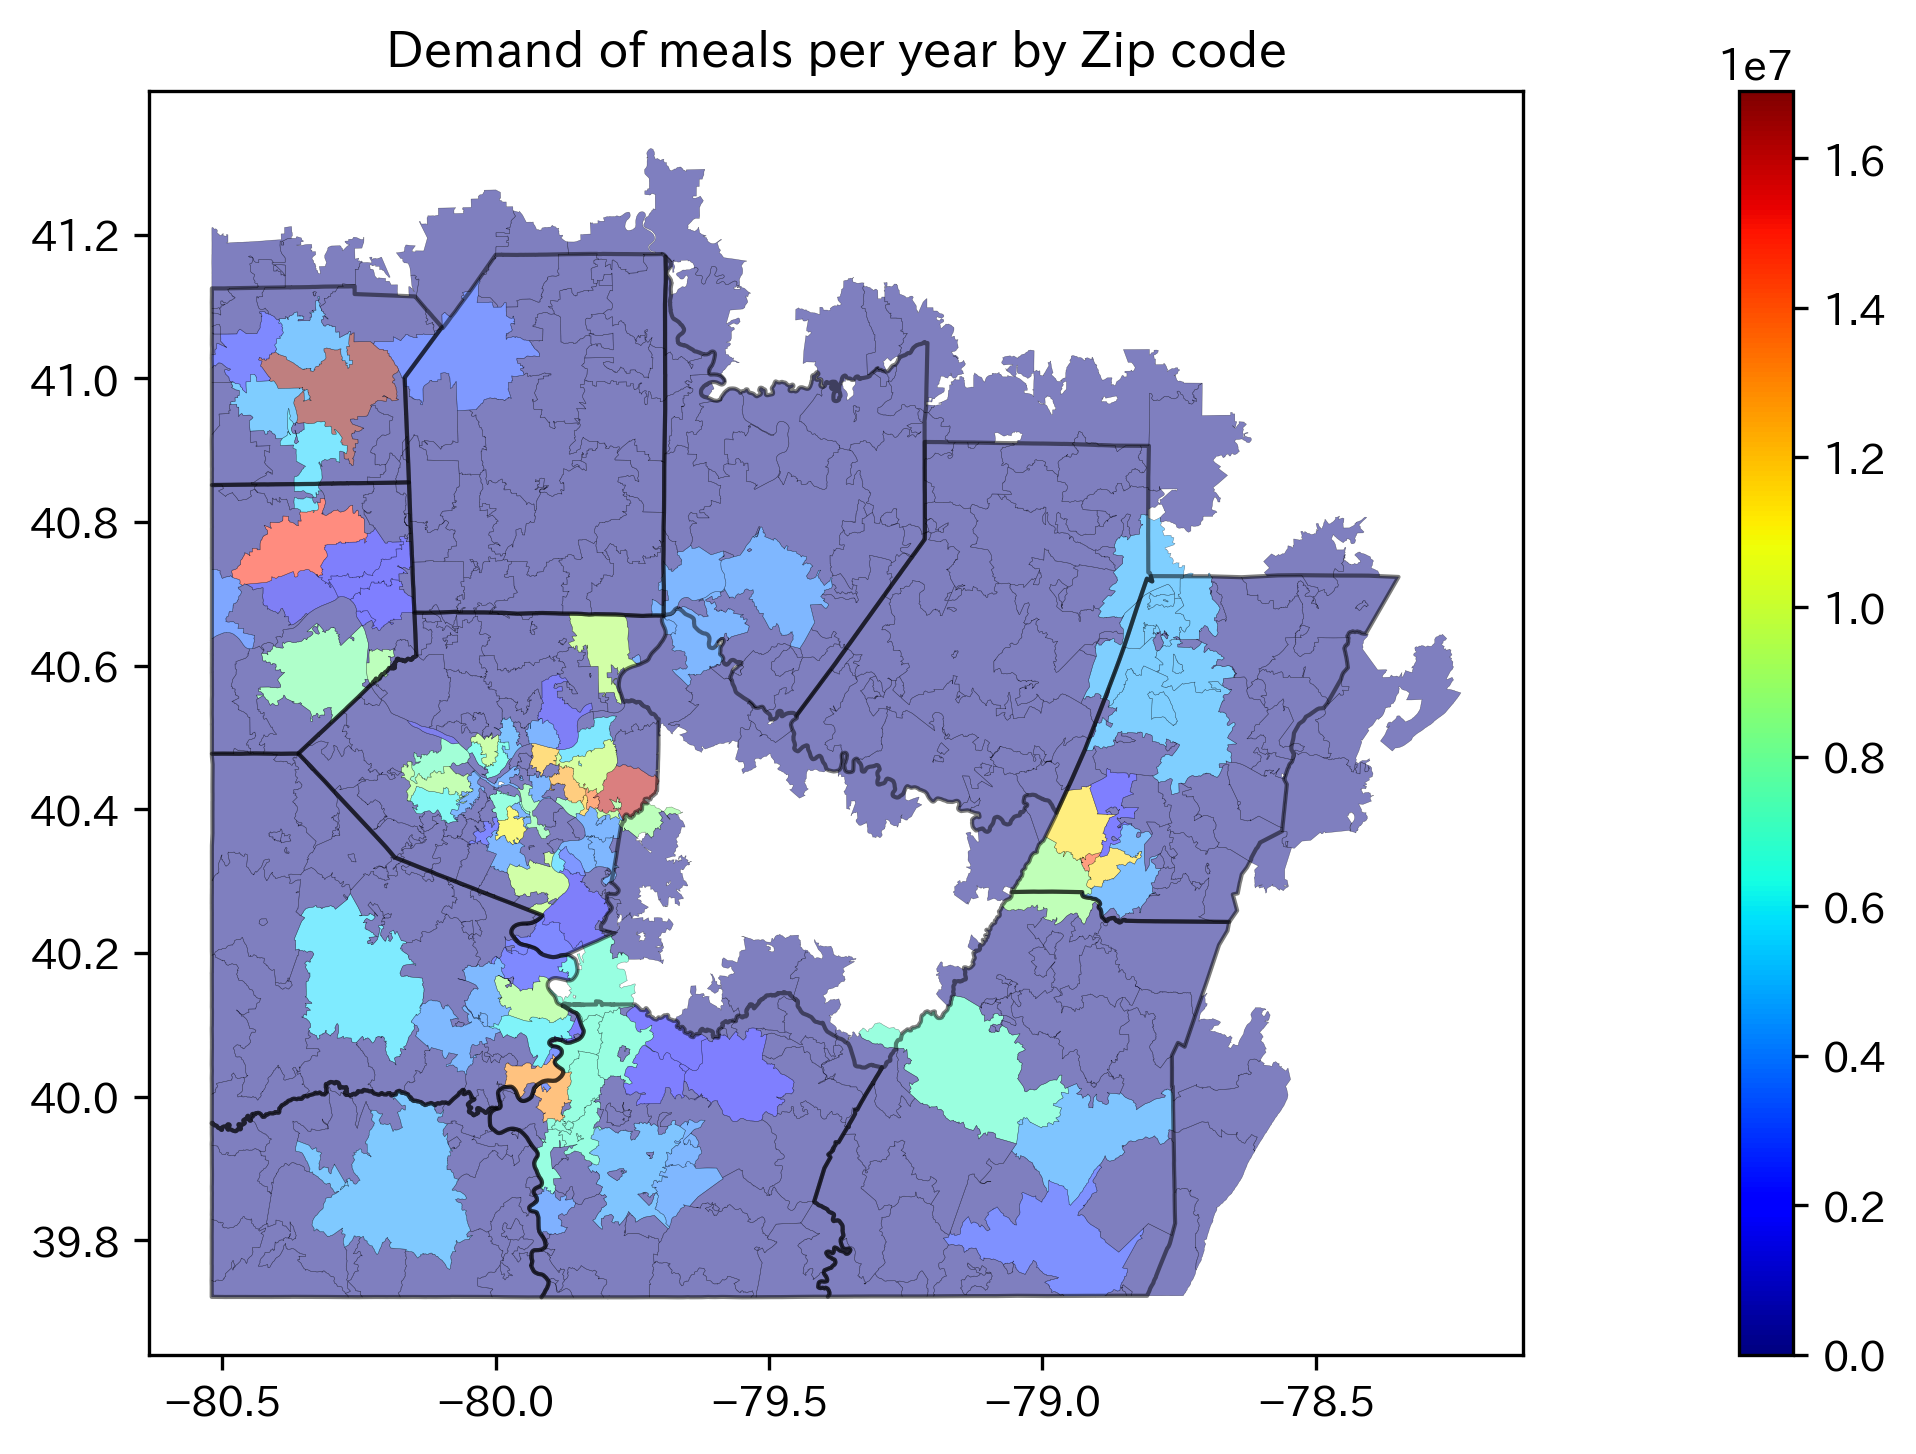

In [76]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata


# Specify the data column name that you want to visualize in color.
data = "Demand_of_meals [meals/year]"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Demand of meals per year by Zip code')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

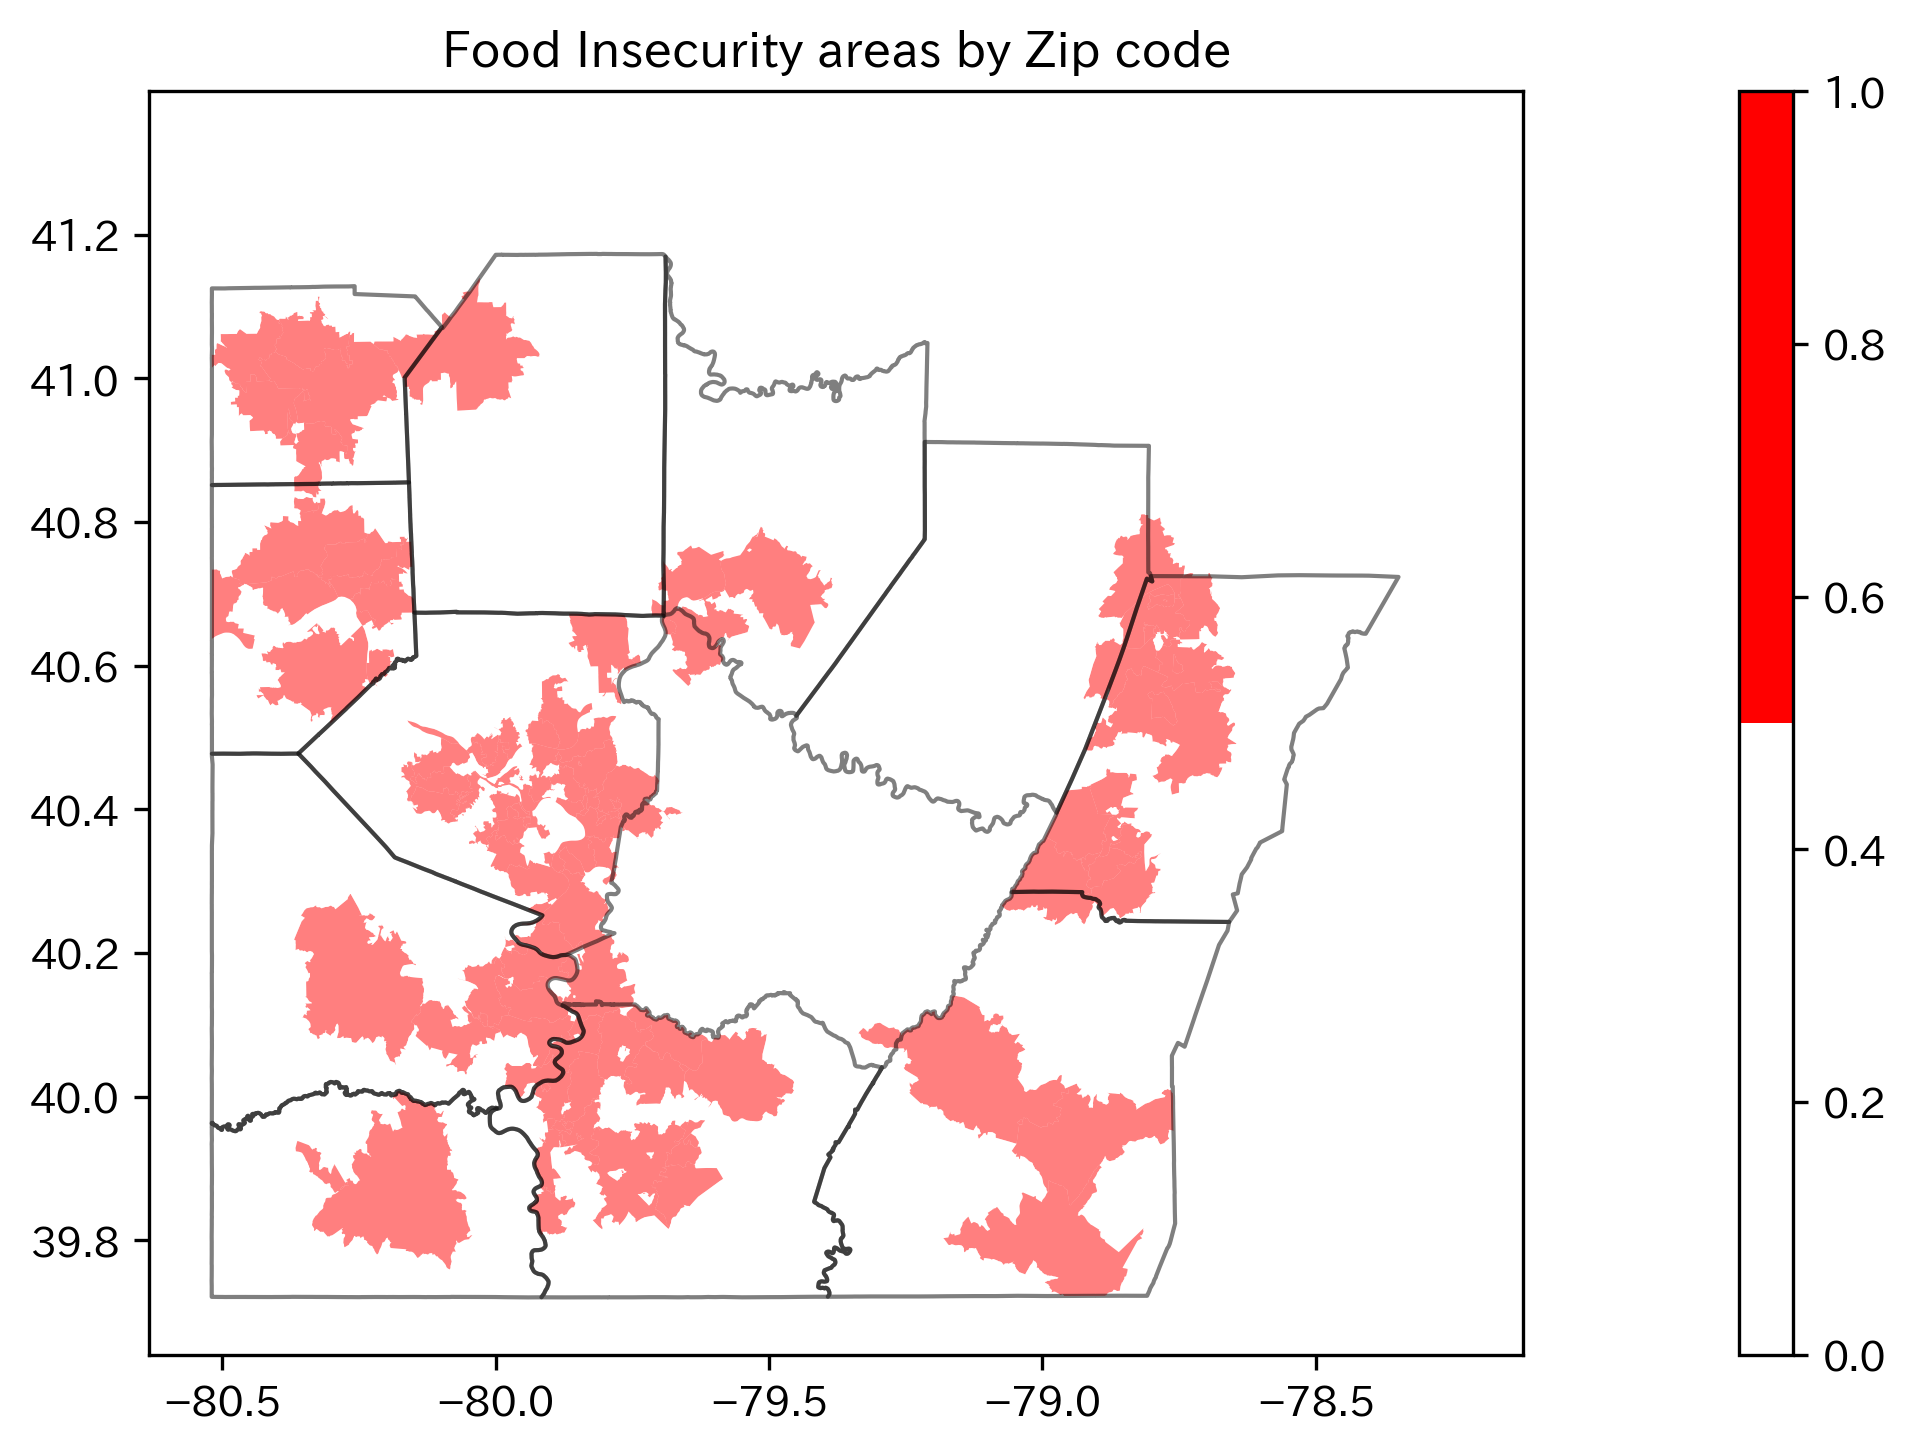

In [80]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Bicolor mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white","red"])

# Specify the data column name that you want to visualize in color.
data = "LILATracts_1And10"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Food Insecurity areas by Zip code')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## 需要と供給のデータをマージする
- Demand: df_2["LILATracts_1And10"]
- Supply: df_['Prepared_food']

In [90]:
df_ = df_.astype({'zipcode': int})
df_3 = pd.merge(df_, df_2, left_on="zipcode", right_on="zip")

In [92]:
df_3.describe()

,NutritionID,ProductWeight,Prepared_food,PF_poundage,zipcode,Prepared_food_2,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
count,151.000000,1.510000e+02,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000,1.510000e+02,1.510000e+02,151.000000,151.000000,151.000000,151.000000
mean,15882.649007,6.719405e+05,138.105960,6908.715232,15368.741722,0.397351,3.325853e+11,0.463576,29679.086093,2627.841060,2.877486e+06,3.325853e+11,0.950214,0.936201,0.987563,0.989908
std,24688.777418,1.167524e+06,716.002562,29077.794666,369.336314,0.490978,2.276029e+11,0.500331,19752.511968,3631.021102,3.975968e+06,2.276029e+11,0.208857,0.237404,0.094615,0.078062
min,3.000000,9.000000e+00,0.000000,0.000000,15001.000000,0.000000,4.200340e+10,0.000000,1232.000000,0.000000,0.000000e+00,4.200340e+10,0.000000,0.000000,0.057093,0.101620
25%,1179.500000,4.535116e+04,0.000000,0.000000,15118.000000,0.000000,1.471948e+11,0.000000,13140.000000,0.000000,0.000000e+00,1.471948e+11,1.000000,1.000000,1.000000,1.000000
50%,6728.000000,2.343659e+05,0.000000,0.000000,15222.000000,0.000000,2.941064e+11,0.000000,24272.000000,0.000000,0.000000e+00,2.941064e+11,1.000000,1.000000,1.000000,1.000000
75%,21991.500000,7.776659e+05,20.000000,918.000000,15423.500000,1.000000,4.415721e+11,1.000000,42347.500000,4184.000000,4.581480e+06,4.415721e+11,1.000000,1.000000,1.000000,1.000000
max,197963.000000,8.959107e+06,8270.000000,302144.000000,16646.000000,1.000000,1.092083e+12,1.000000,96031.000000,15433.000000,1.689914e+07,1.092083e+12,1.000000,1.000000,1.000000,1.000000


In [93]:
# Identify Non Prepared Food and Food Insecurity Area

conditions = [ (df_3['Prepared_food_2'] == 0) & (df_3["LILATracts_1And10"] == 1) ]
choices = [1]

df_3['nonPF_and_FI'] = np.select(conditions, choices, default=0) 

In [94]:
list(df_3)

['NutritionID',
 'ProductWeight',
 'Prepared_food',
 'PF_poundage',
 'zipcode',
 'geometry',
 'Prepared_food_2',
 'CensusTract',
 'LILATracts_1And10',
 'Total_Population',
 'FI_Population',
 'Demand_of_meals [meals/year]',
 'tract',
 'res_ratio',
 'bus_ratio',
 'oth_ratio',
 'tot_ratio',
 'nonPF_and_FI']

In [96]:
df_3[["Prepared_food_2", "LILATracts_1And10", "nonPF_and_FI"]].head(10)

,Prepared_food_2,LILATracts_1And10,nonPF_and_FI
0,0,1,1
1,1,1,0
2,0,0,0
3,0,0,0
4,0,1,1
5,1,1,0
6,1,1,0
7,0,0,0
8,0,1,1
9,1,0,0


In [95]:
df_3["nonPF_and_FI"].head()

0    1
1    0
2    0
3    0
4    1
Name: nonPF_and_FI, dtype: int64

In [97]:
df_3 = pd.merge(df_3, df_geo[["ZCTA5CE20", "geometry"]], left_on="zipcode", right_on="ZCTA5CE20")

In [98]:
df_3.head()

,NutritionID,ProductWeight,Prepared_food,PF_poundage,zipcode,geometry_x,Prepared_food_2,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio,nonPF_and_FI,ZCTA5CE20,geometry_y
0,10217.0,872481.537,0,0.0,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559...",0,588102307708,1,51540,7190,7873050,588102307708,1.0,1.0,1.0,1.0,1,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559..."
1,12864.0,724792.407,17,612.0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602...",1,336048354003,1,18641,7769,8507055,336048354003,1.0,1.0,1.0,1.0,0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602..."
2,931.0,68269.286,0,0.0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343...",0,42125713700,0,4567,0,0,42125713700,0.0,0.0,1.0,1.0,0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343..."
3,252.0,4195.202,0,0.0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656...",0,294049031806,0,30185,0,0,294049031806,1.0,1.0,1.0,1.0,0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656..."
4,259.0,18140.157,0,0.0,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714...",0,420076024508,1,33676,1480,1620600,420076024508,1.0,1.0,1.0,1.0,1,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714..."


In [99]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_3, geometry='geometry_y') 

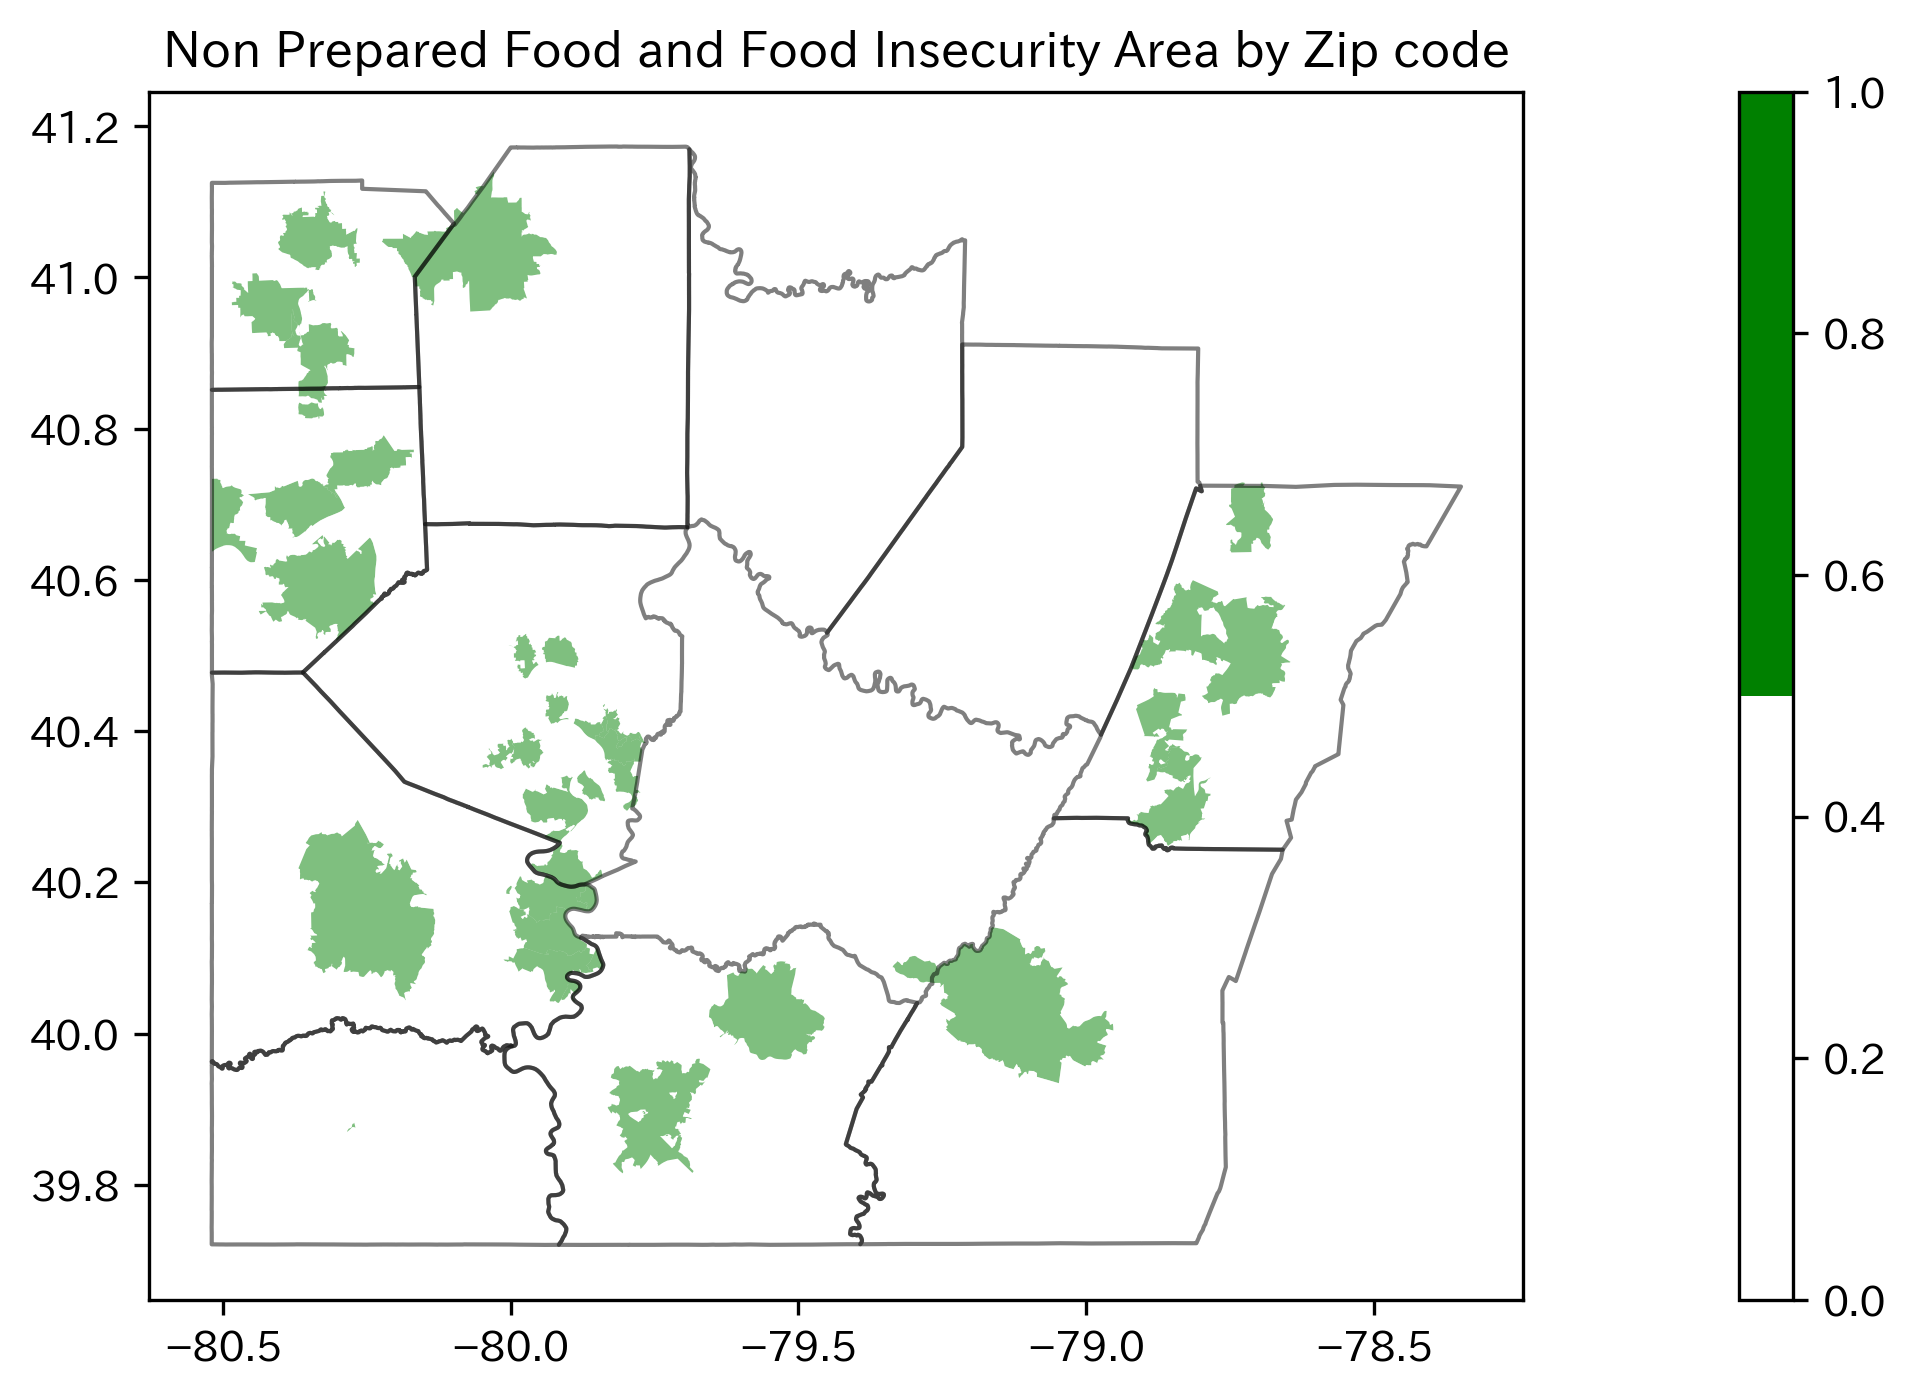

In [100]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Bicolor mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white","green"])

# Specify the data column name that you want to visualize in color.
data = "nonPF_and_FI"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Non Prepared Food and Food Insecurity Area by Zip code')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0, alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0) #line 0.1 -> 0
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)

plt.show()

In [104]:
df_3.head()

,ProductWeight,Prepared_food,PF_poundage,zipcode,geometry_x,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio,nonPF_and_FI,ZCTA5CE20,geometry_y
0,872481.537,0,0.0,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559...",588102307708,1,51540,7190,7873050,588102307708,1.0,1.0,1.0,1.0,1,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559..."
1,724792.407,17,612.0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602...",336048354003,1,18641,7769,8507055,336048354003,1.0,1.0,1.0,1.0,0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602..."
2,68269.286,0,0.0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343...",42125713700,0,4567,0,0,42125713700,0.0,0.0,1.0,1.0,0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343..."
3,4195.202,0,0.0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656...",294049031806,0,30185,0,0,294049031806,1.0,1.0,1.0,1.0,0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656..."
4,18560.157,0,0.0,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714...",420076024508,1,33676,1480,1620600,420076024508,1.0,1.0,1.0,1.0,1,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714..."


In [105]:
df_3.to_csv("nonPF_and_FI.csv")

In [105]:
df_3[df_3["nonPF_and_FI"] == 1].zipcode.unique()

array([15001, 15009, 15022, 15025, 15033, 15035, 15059, 15063, 15066,
       15104, 15112, 15131, 15133, 15137, 15145, 15148, 15209, 15215,
       15217, 15227, 15234, 15301, 15359, 15401, 15412, 15419, 15423,
       15425, 15501, 15904, 15909, 15931, 16057, 16102, 16105, 16157,
       16646])

In [108]:
df_cen_zip.head()

,zip,tract,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,15139,42003526101,OAKMONT,PA,0.000000,0.005587,0.000000,0.000469
1,15139,42003525100,OAKMONT,PA,0.288441,0.041899,0.050420,0.254456
2,15139,42003525300,OAKMONT,PA,0.274537,0.256983,0.172269,0.267355
3,15139,42003525200,OAKMONT,PA,0.437023,0.695531,0.777311,0.477720
4,15222,42003020300,PITTSBURGH,PA,0.293614,0.160600,0.299424,0.243931


In [138]:
df_cen_zip[df_cen_zip["zip"]==15001]["usps_zip_pref_city"].unique()[0]

'ALIQUIPPA'

In [139]:
l_ = []

In [113]:
len(df_3[df_3["nonPF_and_FI"] == 1].zipcode.unique())

37

In [140]:
for i in range(len(df_3[df_3["nonPF_and_FI"] == 1].zipcode.unique())):
    zip_code = df_3[df_3["nonPF_and_FI"] == 1].zipcode.unique()[i]
    l_.append(df_cen_zip[df_cen_zip["zip"]==zip_code]["usps_zip_pref_city"].unique()[0])
    

In [145]:
set(l_)

{'ALIQUIPPA',
 'ALLENPORT',
 'BEAVER',
 'BRADDOCK',
 'CALIFORNIA',
 'CHARLEROI',
 'CLAIRTON',
 'COAL CENTER',
 'CONNELLSVILLE',
 'DONORA',
 'EAST MC KEESPORT',
 'EAST PITTSBURGH',
 'EBENSBURG',
 'HASTINGS',
 'JOHNSTOWN',
 'MCKEESPORT',
 'MIDLAND',
 'MONONGAHELA',
 'NEW BRIGHTON',
 'NEW CASTLE',
 'NORTH VERSAILLES',
 'PITTSBURGH',
 'ROGERSVILLE',
 'SLIPPERY ROCK',
 'SOMERSET',
 'TURTLE CREEK',
 'UNIONTOWN',
 'WAMPUM',
 'WASHINGTON',
 'WILMERDING'}